In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/rajat/Documents/ML_PROJECTS/BITCOIN_CLOSING/bitcoin_price_Training - Training.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.describe()                              ##Doing Data preperation

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [5]:
df.dtypes                ##To see All Columns Data Type

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])  ##Converting Date format From Object to 'datetime' format bcoz 'Date' must support Timestamp nature

In [7]:
df['Date'].dtypes

dtype('<M8[ns]')

In [8]:
#Now We need to Sort data According to 'Date' to maintain the heirachy and update it in 'df'
df=df.sort_index()

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [10]:
#Must Condition of time Series use case is that 'Date' be row  index
#So we now make 'Date' as Index
df.set_index('Date',inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [12]:
#date is Now Row index
#till now we did some basic data cleaning and data is ready for analysis

#Now we will do some EDA on data
data=df.copy()   #making copy of clean data in 'data'

In [13]:
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


Text(0, 0.5, 'Bitcoin Price in $')

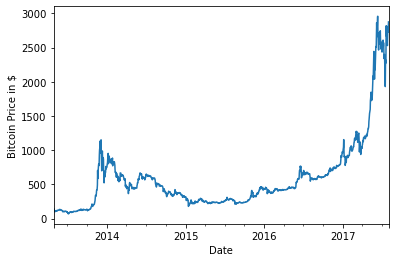

In [14]:
data['Close'].plot()    #plot 'close' value according to 'Date'
plt.ylabel('Bitcoin Price in $')  #to write label on y axis of line plot

In [15]:
# Main Goal is to Tackel the closing price so we'll Copy it in a new variable 'data2'
data2=data['Close']

In [16]:
data2.head()

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

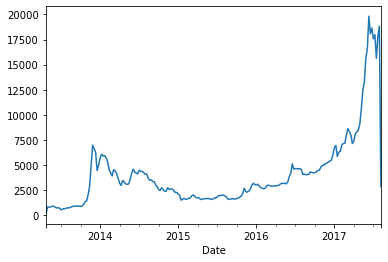

In [17]:
# Now we'll do re-sampling of Data
data2.resample('W').sum().plot()  #here we resample data on weekly bases by taking of sum of closing price
#and ploting data

<AxesSubplot:xlabel='Date'>

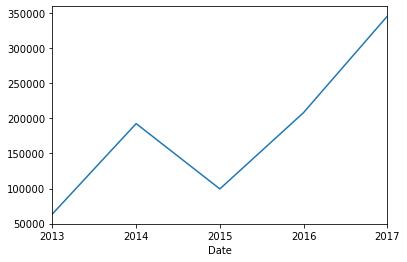

In [18]:
#now we'll try to resample data on yearly bases..with sum closing price
data2.resample('Y').sum().plot()

<AxesSubplot:xlabel='Date'>

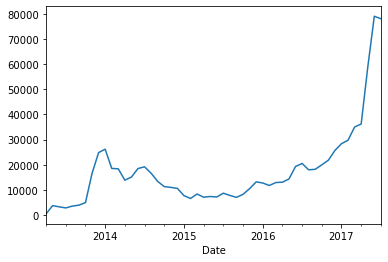

In [19]:
#now on mothly bases with closing price sum
data2.resample('M').sum().plot()

<AxesSubplot:xlabel='Date'>

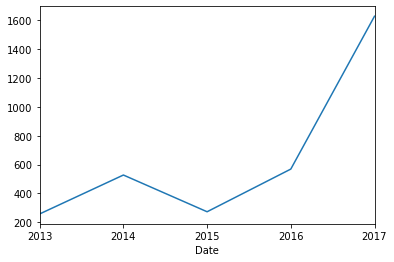

In [20]:
# Avg closing price with respect to diff. year
data2.resample('Y').mean().plot()

#similary we can apply min(),max(),count()

In [21]:
#to analyse data on wewkly bases we need to fist find day of week
data2.index.dayofweek

Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6],
           dtype='int64', name='Date', length=1556)

In [22]:
#After finding day of week we need to group-by every data according to avg. each day's closing price per week
weekday=data.groupby(data2.index.dayofweek)['Close'].mean() #let assign this data to'weekday'
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [23]:
#above our data is grouped according to avg. each day on various week
#now replace day index with day name
weekday.index=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']


In [24]:
weekday

Mon      588.738655
Tue      582.402658
Wed      581.731216
Thurs    585.565135
Fri      583.876622
Sat      584.545180
Sun      582.802511
Name: Close, dtype: float64

<AxesSubplot:>

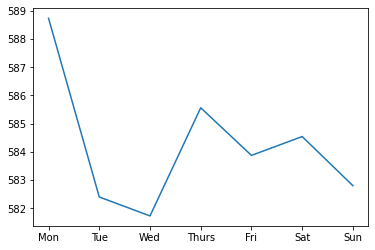

In [25]:
weekday.plot()  

In [26]:
#now we'll analize avg. closing price by day

days=data2.index.dayofyear

In [27]:
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
            127, 126, 125, 124, 123, 122, 121, 120, 119, 118],
           dtype='int64', name='Date', length=1556)

In [28]:
data.groupby(days)['Close'].mean()

Date
1      629.5775
2      643.1525
3      643.4125
4      677.8800
5      663.3350
         ...   
362    600.1375
363    616.6550
364    616.7475
365    616.5025
366    963.7400
Name: Close, Length: 366, dtype: float64

Text(0, 0.5, 'Avg Closing Price')

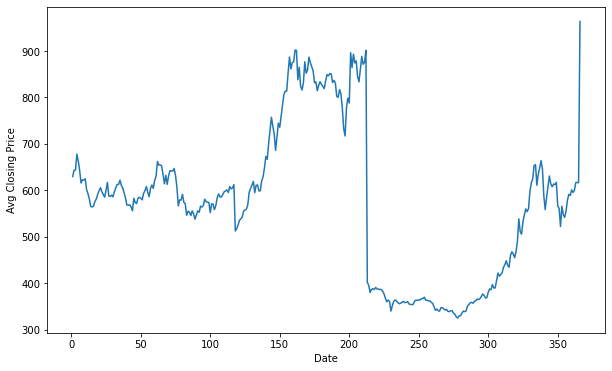

In [29]:
plt.figure(figsize=(10,6))        ## Resizing Image of graph
data.groupby(days)['Close'].mean().plot()
plt.ylabel('Avg Closing Price') #setting Y-Label

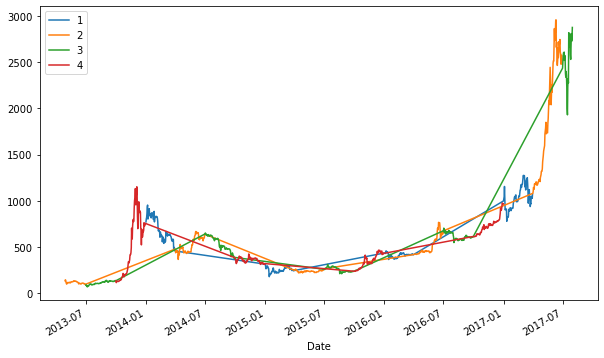

In [30]:
#plotting graph according to per Quater
plt.figure(figsize=(10,6))
data.groupby(data2.index.quarter)['Close'].plot()
plt.legend()           # Showing index color relationship with Quarter


In [31]:
# now firstly we need to define day whether it is a week day or weekend
#for this we use 'dayofweek' func. which will represent data as [0,1,2,3,4,5,6]
#if dayofweek<5 then it is a weekend a ; Adding weekend day coloumn in our data
data['dayofweek']=data.index.dayofweek

In [32]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3


In [33]:
def assign_label(feature):
    if feature<5:
        return 'weekdays'
    else:
        return 'weekends'

In [34]:
data['dayofweek']=data['dayofweek'].apply(assign_label)   #Assinging label to per date acco. to weekday or weekends
#and adding it in data table as seprate coloumn

In [35]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays


In [36]:
data[data['dayofweek']=='weekends'].head()  #plotting All weekends from data

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends
2017-07-23,2808.10,2832.18,2653.94,2730.40,"1,072,840,000","46,231,100,000",weekends
2017-07-22,2668.63,2862.42,2657.71,2810.12,"1,177,130,000","43,929,600,000",weekends
2017-07-16,1991.98,2058.77,1843.03,1929.82,"1,182,870,000","32,767,600,000",weekends


<AxesSubplot:title={'center':'weekdays'}, xlabel='Date'>

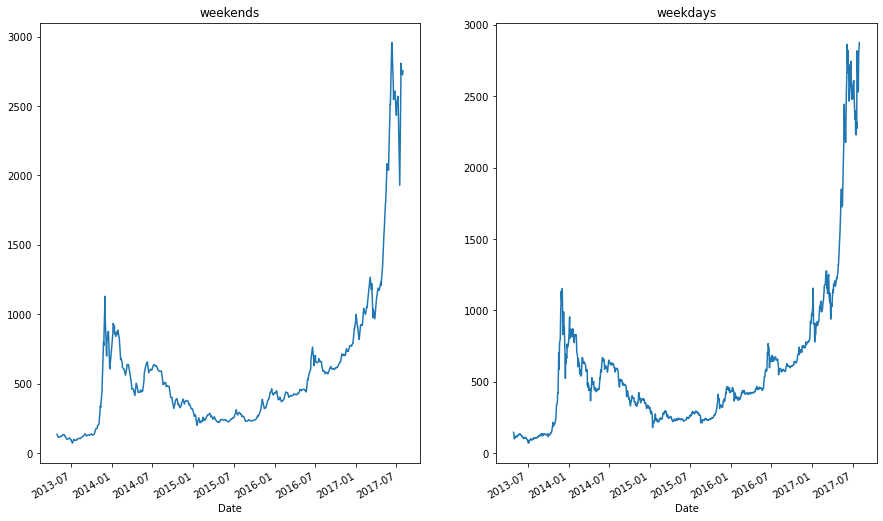

In [37]:
#Now we will plot 2 chart {1-acc. to weekends ; 2-acc. to weekdays}
fig,ax=plt.subplots(1,2,figsize=(15,9))  #Making 2 Figure fig,ax of 15,9 size
#ploting graph in 1st block
data[data['dayofweek']=='weekends']['Close'].plot(ax=ax[0],title='weekends')
data[data['dayofweek']=='weekdays']['Close'].plot(ax=ax[1],title='weekdays')

In [38]:
#doing prediction using 'Naive model'
data['prediction_naive']=data['Close'].shift(1) #adding a new col. and storing predictive value calculated by shift() from position 1

In [39]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01


<AxesSubplot:xlabel='Date'>

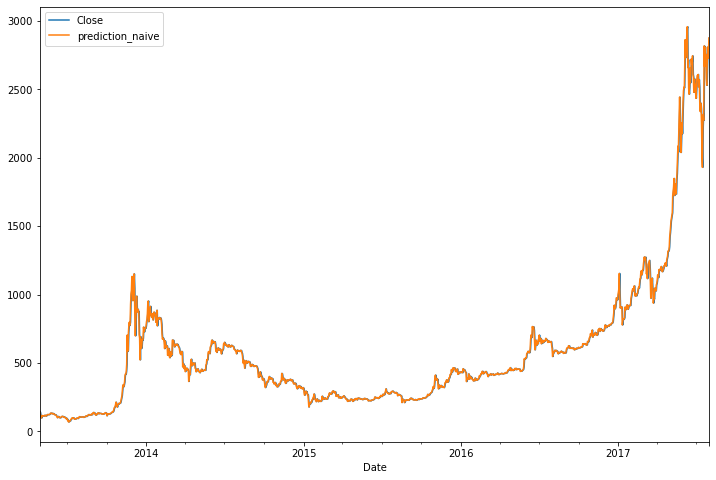

In [40]:
#ploting prediction
data[['Close','prediction_naive']].plot(figsize=(12,8))

In [41]:
#now we will found aut error or accuracy ; we use mean_squared_error
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(data['Close'][1:],data['prediction_naive'][1:]) 
#here we find mean square error between 'close' data from 'data' and prediction
#o/p is square value so we need to take under root of it

1386.3434001929265

In [43]:
np.sqrt(mean_squared_error(data['Close'][1:],data['prediction_naive'][1:]))

37.23363264835875

<AxesSubplot:xlabel='Date'>

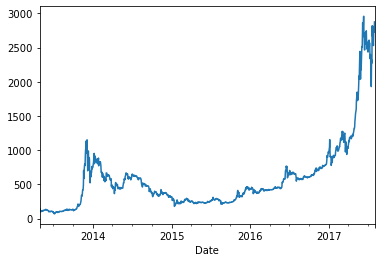

In [44]:
#Examine seasonality or Noise in Our Data
data['Close'].plot()


In [45]:
# There are some seeasonality in data .. we need to remove it and make it static
mean=data['Close'].rolling(window=7).mean()  #mean {from 1to7 then 2to8....}
std=data['Close'].rolling(window=7).std()  #Standard Deviation


In [46]:
mean

Date
2017-07-31           NaN
2017-07-30           NaN
2017-07-29           NaN
2017-07-28           NaN
2017-07-27           NaN
                 ...    
2013-05-02    109.820000
2013-05-01    110.308571
2013-04-30    114.237143
2013-04-29    118.842857
2013-04-28    121.457143
Name: Close, Length: 1556, dtype: float64

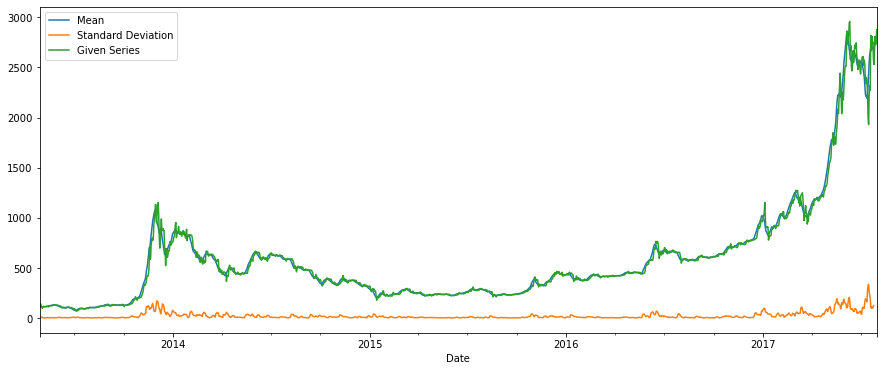

In [47]:
#Now Ploting mean ,std. and given series
plt.figure(figsize=(15,6))
mean.plot(label='Mean')
std.plot(label='Standard Deviation')
data['Close'].plot(label='Given Series')
plt.legend()

In [48]:
#above mean std. is not static..it is changing with time..so we need to remove this seasonality
from statsmodels.tsa.stattools import adfuller

In [49]:
data['Close'].isnull().sum()   # to check if any null values in our data

0

In [50]:
#there is  no null value

In [51]:
adfuller(data['Close'])

(-4.477989431941969,
 0.0002154535155876224,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '5%': -2.863429668579316,
  '10%': -2.5677760318409732},
 14821.384786923289)

In [52]:
#above p value=.0002154.. <.5 so null hypothesis rejected : so data is stationary
#now store this data 
result=adfuller(data['Close'])
labels=['ADf Test Statistics','P-value','lags used','No. of obs used']

#combining result data and 'labels'
for value,label in zip(result,labels):
    print('{} : {}'.format(label,value))


ADf Test Statistics : -4.477989431941969
P-value : 0.0002154535155876224
lags used : 24
No. of obs used : 1531


In [53]:
#now we will automate above step of checking stationarity
def test_for_stationerity(feature):
    mean=data[feature].rolling(window=7).mean() 
    std=data[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,6))
    mean.plot(label='Mean')
    std.plot(label='Standard Deviation')
    data[feature].plot(label='Given Series')
    plt.legend()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statistics','P-value','lags used','No. of obs used']

    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
    if result[1]<=0.5:
        print('Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary')
    else:
        print('Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary')


ADf Test Statistics : -4.477989431941969
P-value : 0.0002154535155876224
lags used : 24
No. of obs used : 1531
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


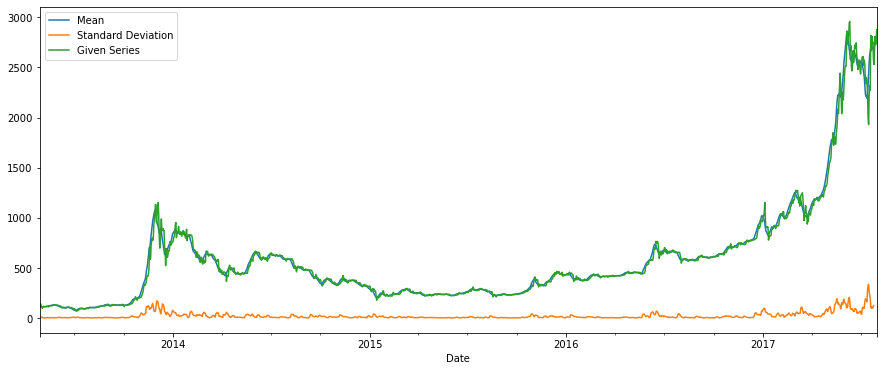

In [54]:
test_for_stationerity('Close')

<AxesSubplot:xlabel='Date'>

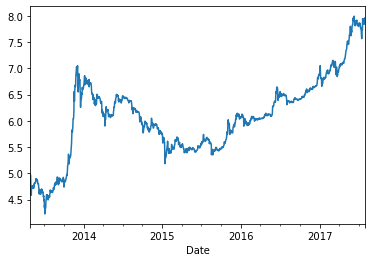

In [55]:
#now applying log transformation
log_data=np.log(data['Close'])
np.log(data['Close']).plot()

In [56]:
#computing rolling avg
rolling_avg=log_data-log_data.shift(7)  #shifting by 7 

In [57]:
Rolling_average=log_data.rolling(window=7).mean()

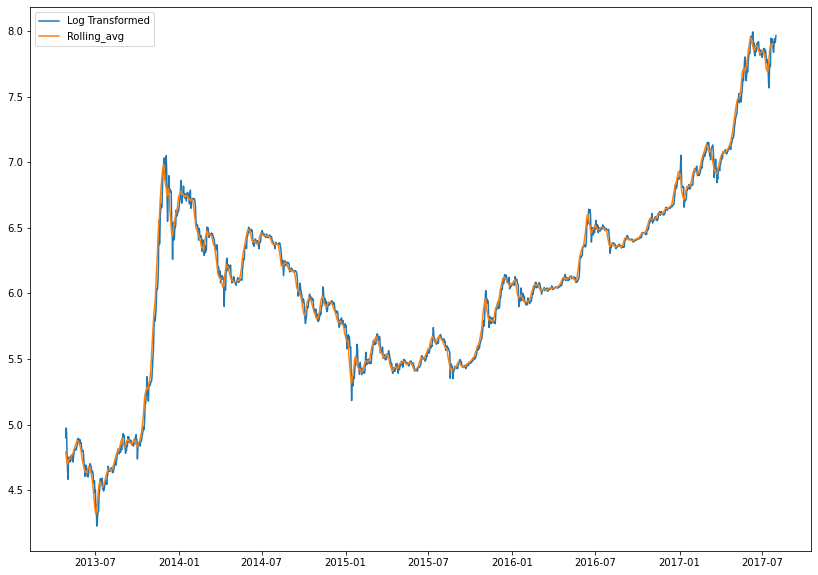

In [58]:
plt.figure(figsize=(14,10))
plt.plot(log_data,label='Log Transformed')
plt.plot(Rolling_average,label='Rolling_avg')
plt.legend()

In [59]:
lr_diff=log_data-Rolling_average

In [60]:
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [61]:
#assingning all value in data-frame
data['lr_diff']=lr_diff

ADf Test Statistics : -7.188887202324554
P-value : 2.5340955586100355e-10
lags used : 22
No. of obs used : 1527
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


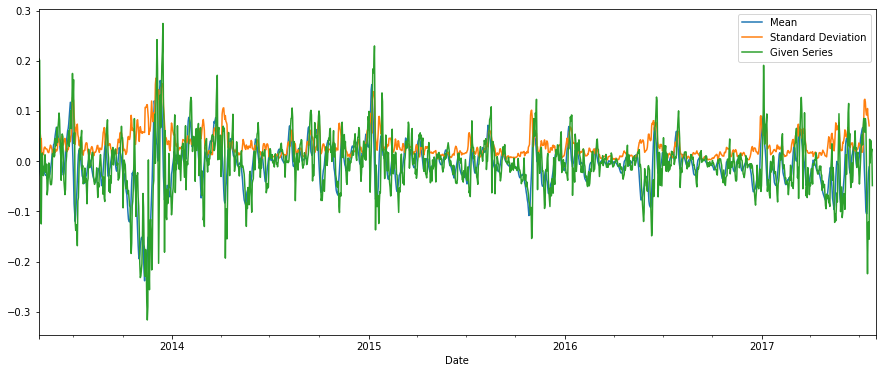

In [62]:
test_for_stationerity('lr_diff')

In [63]:
log_ts=log_data-log_data.shift(7)

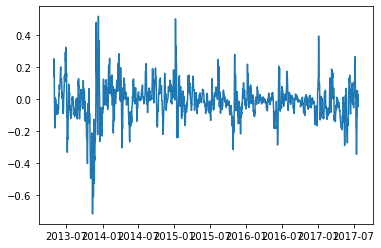

In [64]:
plt.plot(log_ts)    #w.r.t seasonality we have this trend

ADf Test Statistics : -6.511722596316726
P-value : 1.0961860829579836e-08
lags used : 23
No. of obs used : 1525
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


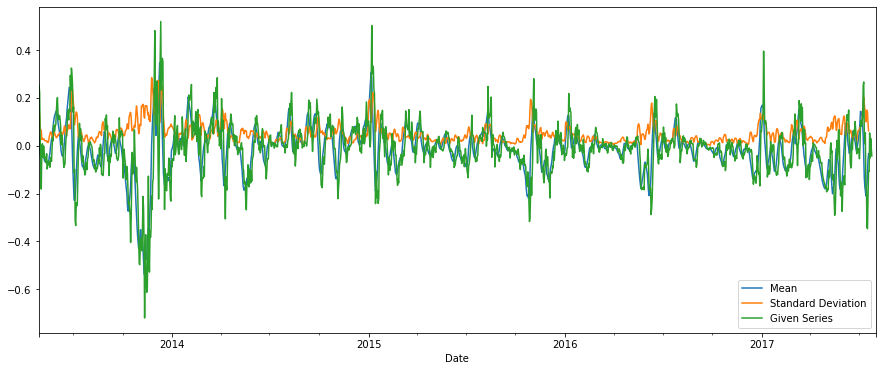

In [65]:
#ploting this data with stationarity test
data['log_ts']=log_ts
test_for_stationerity('log_ts')

In [66]:
#Finally doing Forecast using Prophet Model 

In [67]:
!pip install fbprophet

In [93]:
from fbprophet import Prophet

In [94]:
model=Prophet()

In [128]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN,NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34,NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18,NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45,NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01,NaN,NaN


In [129]:
df=data[['Close']]
df.head()

,Close
Date,
2017-07-31,2875.34
2017-07-30,2757.18
2017-07-29,2726.45
2017-07-28,2809.01
2017-07-27,2671.78


In [130]:
df=df.reset_index()

In [131]:
df.columns=['ds','y']

In [132]:
df.head()

,ds,y
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [135]:
model.fit(df)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [137]:
future=m.make_future_dataframe(periods=500,freq='D')

In [138]:
future.head()

,ds
0,2013-04-28
1,2013-04-29
2,2013-04-30
3,2013-05-01
4,2013-05-02


In [139]:
data.shape

(1556, 10)

In [140]:
future.shape

(2056, 1)

In [141]:
forecast=m.predict(future)

In [142]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,78.013914,-217.410104,56.381032,78.013914,78.013914,-154.730349,-154.730349,-154.730349,-2.728693,-2.728693,-2.728693,-152.001656,-152.001656,-152.001656,0.0,0.0,0.0,-76.716435
1,2013-04-29,76.042304,-216.215135,61.908263,76.042304,76.042304,-144.214701,-144.214701,-144.214701,1.480335,1.480335,1.480335,-145.695036,-145.695036,-145.695036,0.0,0.0,0.0,-68.172397
2,2013-04-30,74.070694,-202.146420,82.159857,74.070694,74.070694,-136.941412,-136.941412,-136.941412,2.455150,2.455150,2.455150,-139.396562,-139.396562,-139.396562,0.0,0.0,0.0,-62.870719
3,2013-05-01,72.099083,-203.245182,81.794750,72.099083,72.099083,-133.029361,-133.029361,-133.029361,0.053955,0.053955,0.053955,-133.083316,-133.083316,-133.083316,0.0,0.0,0.0,-60.930278
4,2013-05-02,70.127473,-199.091344,84.537037,70.127473,70.127473,-124.550376,-124.550376,-124.550376,2.178101,2.178101,2.178101,-126.728477,-126.728477,-126.728477,0.0,0.0,0.0,-54.422903


In [143]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2046,2018-12-04,5587.349564,3155.666046,8010.214200
2047,2018-12-05,5586.897199,3145.849320,8052.950010
2048,2018-12-06,5590.384867,3085.462484,8043.696604
2049,2018-12-07,5587.862758,3103.062760,8078.466456
2050,2018-12-08,5587.249932,3133.705219,8141.700373
2051,2018-12-09,5586.850155,3069.009790,8076.865174
2052,2018-12-10,5590.897150,3082.779889,8047.689207
2053,2018-12-11,5591.548155,3089.374667,8102.190623
2054,2018-12-12,5588.748898,3069.402777,8070.284320
2055,2018-12-13,5590.484927,3030.567550,8169.309468


In [144]:
#plot our forecast

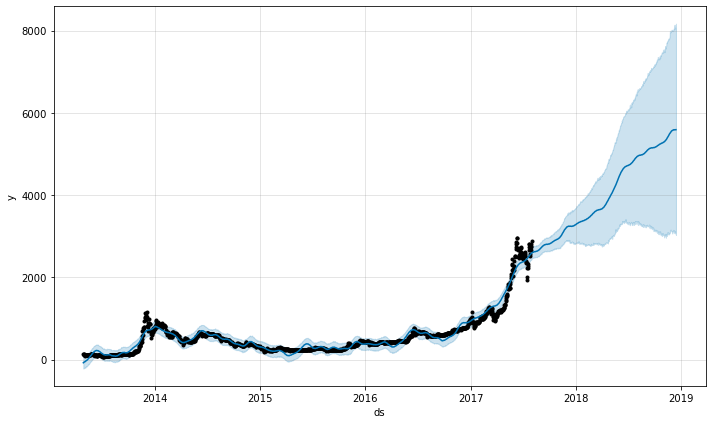

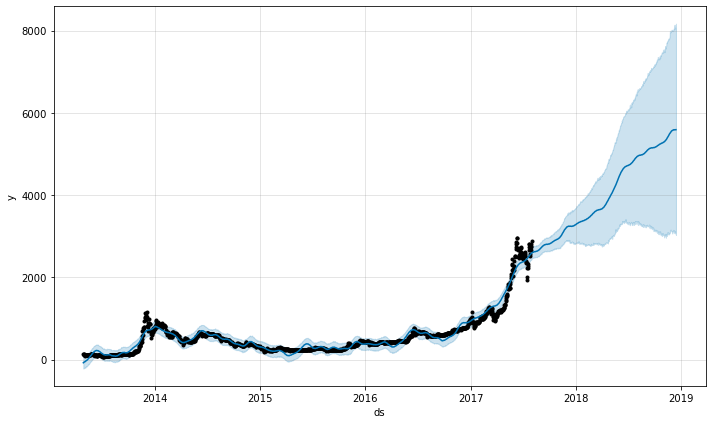

In [145]:
model.plot(forecast)

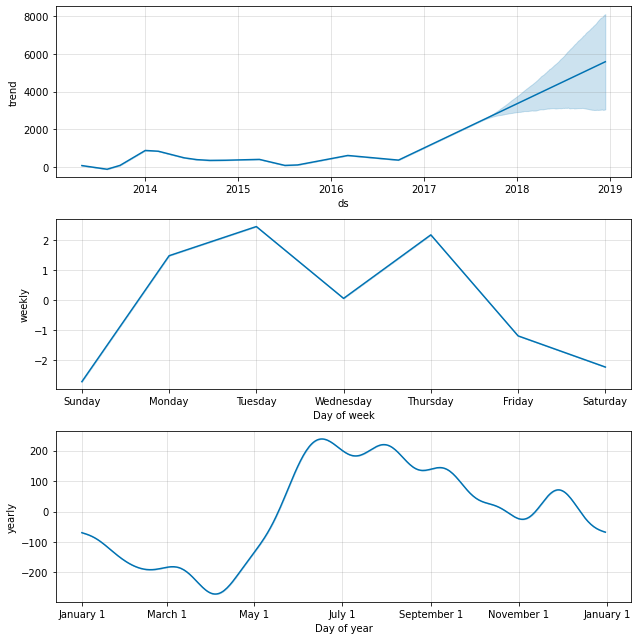

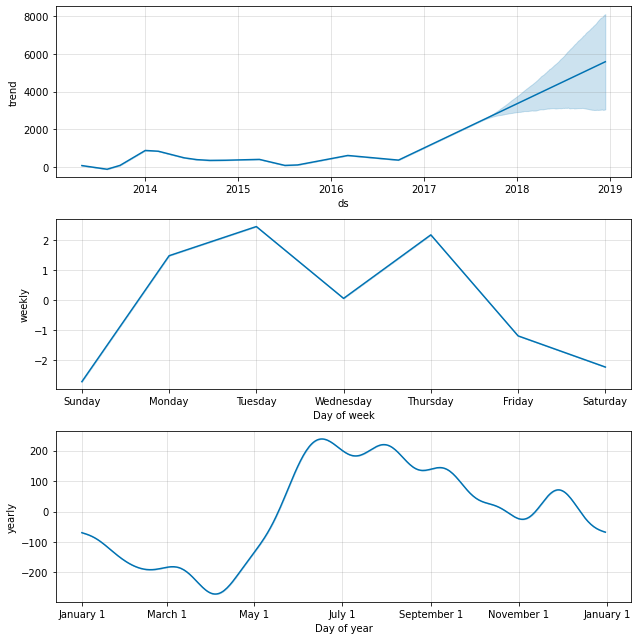

In [146]:
model.plot_components(forecast)

In [149]:
from fbprophet.diagnostics import cross_validation

In [157]:
df_cv=cross_validation(model,horizon='365 days',period='180 Days',initial='1095 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [158]:
df_cv.shape

(365, 6)

In [159]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.246416,602.914880,765.341974,606.27,2016-07-31
1,2016-08-02,688.461819,611.044297,771.394513,547.47,2016-07-31
2,2016-08-03,687.787785,612.207371,773.648498,566.36,2016-07-31
3,2016-08-04,688.579766,608.432388,774.679195,578.29,2016-07-31
4,2016-08-05,688.732000,605.231130,770.464078,575.04,2016-07-31


In [160]:
from fbprophet.plot import plot_cross_validation_metric

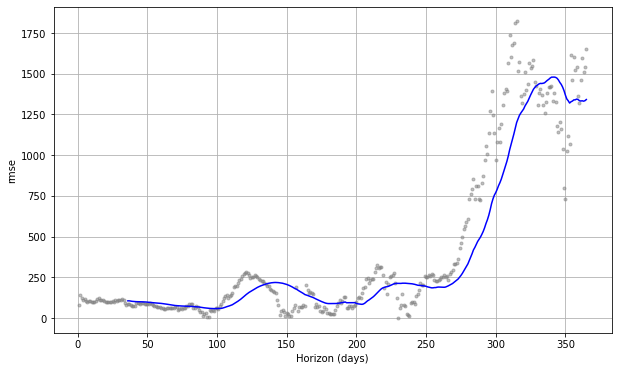

In [161]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

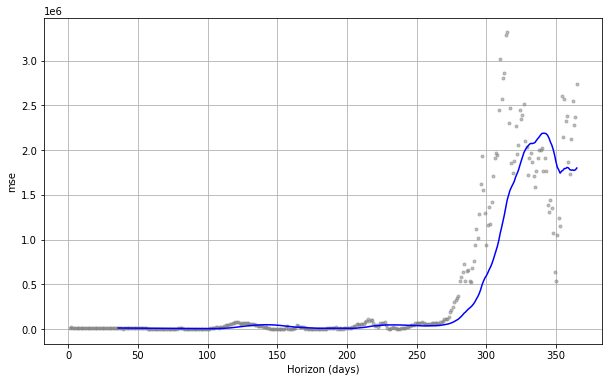

In [162]:
fig=plot_cross_validation_metric(df_cv,metric='mse')